<a href="https://colab.research.google.com/github/safikhanSoofiyani/CS6910-Assignment-2/blob/main/CS6910_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import os

# Importing libraries related to Image Preprocessing
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

# Importing libraries related to CNN Model building
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation,Dropout,BatchNormalization
from keras.models import Model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

random.seed(hash("seriously you compete with me") % 2**32 - 1)
np.random.seed(hash("i am mohammed safi") % 2**32 - 1)
tf.random.set_seed(hash("ur rahman khan") % 2**32 - 1)


In [4]:
from tensorflow.python.keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

In [3]:
!nvidia-smi

Mon Mar 28 09:36:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install wandb
import wandb

from wandb.keras import WandbCallback

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# # Creating a CNN: number of filters, size of filters, activation function has to be 
# # user specified
# img_shape=(256,256,3)
# def build_cnn( batch_norm, num_filters, dropout, conv_activation, dense_activation, filter_size, pool_kernel_size, dense_layer):
#   # batch_norm       : "Boolean" set to True, if you are using batch normalization
#   # num_filters      : "List" number of activation filters for each layer
#   # dropout          : "float or double" specify the dropout % for regularization (in decimals)
#   # conv_activation  : "List" activation used for convolution layer
#   # dense_activation : "String" acitvation used for densely connected layers
#   # filter_size      : "List" kernel sizes for convultion layers
#   # pool_kernel_size : "List" kernel sizes for maxpooling layers
#   # dense_layer      : "Integer" number of neurons in the dense layer
  
  
#   model=Sequential()
#   # Adding the first conv,activ,maxpool layers
#   model.add(Conv2D(filters = num_filters[0],
#                    kernel_size = filter_size[0],
#                    input_shape=img_shape))
  
#   # Add batch normalization layer, if the user specifies
#   if batch_norm:
#     model.add(BatchNormalization())
  
#   model.add(Activation(conv_activation[0]))

#   model.add(MaxPool2D(pool_size = pool_kernel_size[0], strides = (2,2)))

#   # Adding the next 4 layer blocks
#   for i in range(1,5):
#     model.add(Conv2D(filters = num_filters[i],kernel_size = filter_size[i]))
#     if batch_norm:
#       model.add(BatchNormalization())
#     model.add(Activation(conv_activation[i]))
#     model.add(MaxPool2D(pool_size = pool_kernel_size[i], strides = (2,2)))
  
#   # Flattening the feature map to a column vector
#   model.add(Flatten())
#   model.add(Dense(units = dense_layer, activation = dense_activation))
#   # Adding dropout regularization
#   model.add(Dropout(dropout))
#   # Adding the final Dense layer with dimensions equal to number of classes and softmax activation
#   model.add(Dense(10, activation = "softmax"))

#   return model


In [4]:
# Creating a CNN: number of filters, size of filters, activation function has to be 
# user specified
img_shape=(256,256,3)
def build_cnn(conv_activation , dense_activation, num_filters, conv_filter_size, pool_filter_size, batch_norm, dense_layer, dropout):
  # conv_activation     : "List" activation used for convolution layer
  # dense_act           : "String" acitvation used for densely connected layers
  # num_filters         : "List" number of activation filters for each layer
  # conv_filter_size    : "List" kernel sizes for convultion layers
  # pool_filter_size    : "List" kernel sizes for maxpooling layers
  # batch_norm          : "Boolean" set to True, if you are using batch normalization
  # dim_final           : "Integer" dimensionality of output space after 5 blocks of convultion, maxpooling blocks
  # dropout             : "float or double" specify the dropout % for regularization (in decimals)
  
  model=Sequential()
  # Adding the first conv,activ,maxpool layers
  model.add(Conv2D(filters=num_filters[0],
                   kernel_size=conv_filter_size[0],
                   input_shape=img_shape))
  
  # Add batch normalization layer, if the user specifies
  if batch_norm:
    model.add(BatchNormalization())
  
  model.add(Activation(conv_activation[0]))
  model.add(MaxPool2D(pool_size=pool_filter_size[0],strides=(2,2)))

  # Adding the next 4 layer blocks
  for i in range(1,5):
    model.add(Conv2D(filters=num_filters[i],kernel_size=conv_filter_size[i]))
    if batch_norm:
      model.add(BatchNormalization())
    model.add(Activation(conv_activation[i]))
    model.add(MaxPool2D(pool_size=pool_filter_size[i],strides=(2,2)))
  
  # Flattening the feature map to a column vector
  model.add(Flatten())
  model.add(Dense(units=dense_layer ,activation = dense_activation))
  # Adding dropout regularization
  model.add(Dropout(dropout))
  # Adding the final Dense layer with dimensions equal to number of classes and softmax activation
  model.add(Dense(10,activation="softmax"))

  return model

In [7]:
conv=["relu","relu","relu","relu","relu"]
den="relu"
filt=[32,64,128,256,512]
conv_size=[(3, 3), (3, 3), (3, 3), (5, 5), (7, 7)]
pool_size = [(2, 2), (2, 2), (2, 2), (2, 2), (2, 2)]
model=build_cnn(conv,den,filt,conv_size,pool_size,True,512,0.8)

Input pipeline for image classification reference :
https://towardsdatascience.com/what-is-the-best-input-pipeline-to-train-image-classification-models-with-tf-keras-eb3fe26d3cc5

In [ ]:
# Dataset without augmentation

# Enter the path of dataset
path=r"/content/drive/MyDrive/nature_12K/inaturalist_12K/train"

# Training dataset:
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=19,
    validation_split=0.1,
    subset='training'
)
# Validation dataset:
valid_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory=path,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=19,
    validation_split=0.1,
    subset='validation'
)

Found 9999 files belonging to 10 classes.
Using 9000 files for training.
Found 9999 files belonging to 10 classes.
Using 999 files for validation.


In [ ]:
len_train,len_valid=len(train_dataset),len(valid_dataset)
# # Retaining 10% of data for hyperparameter tuning
# train_data=train_dataset.take(int(0.9*len_train))
# valid_data=valid_dataset.take(int(0.1*len_valid))
print(len(train_dataset))

282


In [8]:
# Dataset with augmentation
path=r"/content/drive/MyDrive/nature_12K/inaturalist_12K/train"
training_data_augmentation=ImageDataGenerator(rescale=1./255,
                                        height_shift_range=0.2,
                                        width_shift_range=0.2,
                                        horizontal_flip=True,
                                        zoom_range=0.2,
                                        fill_mode="nearest",
                                        validation_split = 0.1)

# Validation data is not being augmented
validation_data_augmentation=ImageDataGenerator(
    validation_split=0.1
)

train_aug=training_data_augmentation.flow_from_directory(path,shuffle=True,seed=19,subset='training')
valid_aug=validation_data_augmentation.flow_from_directory(path,shuffle=True,seed=19,subset='validation')



Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(name='loss'),
              metrics=[tf.keras.metrics.CategoricalAccuracy(name='acc')])

history=model.fit(x=train_aug,
                  epochs=10,
                  validation_data=valid_aug,callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_acc', patience = 5)]
                  )

Epoch 1/10
282/282 [==============================] - 2323s 8s/step - loss: 2.4544 - acc: 0.1631 - val_loss: 32.2690 - val_acc: 0.1021
Epoch 2/10
282/282 [==============================] - 243s 862ms/step - loss: 2.2421 - acc: 0.1719 - val_loss: 64.6832 - val_acc: 0.1021
Epoch 3/10
282/282 [==============================] - 236s 835ms/step - loss: 2.2156 - acc: 0.1870 - val_loss: 150.1603 - val_acc: 0.1061
Epoch 4/10
282/282 [==============================] - 235s 832ms/step - loss: 2.2010 - acc: 0.1953 - val_loss: 433.7595 - val_acc: 0.1201
Epoch 5/10
282/282 [==============================] - 234s 831ms/step - loss: 2.1755 - acc: 0.2112 - val_loss: 187.3804 - val_acc: 0.1051
Epoch 6/10
282/282 [==============================] - 234s 831ms/step - loss: 2.1635 - acc: 0.2180 - val_loss: 407.7685 - val_acc: 0.1481
Epoch 7/10
282/282 [==============================] - 234s 829ms/step - loss: 2.1592 - acc: 0.2168 - val_loss: 139.5303 - val_acc: 0.1091
Epoch 8/10
282/282 [==================

In [7]:
def get_data():
    path=r"/content/drive/MyDrive/nature_12K/inaturalist_12K/train"

    # Training dataset:
    train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
        directory=path,
        labels='inferred',
        label_mode='categorical',
        color_mode='rgb',
        batch_size=32,
        image_size=(256,256),
        shuffle=True,
        validation_split=0.1,
        subset='training'
    )
    # Validation dataset:
    valid_dataset=tf.keras.preprocessing.image_dataset_from_directory(
        directory=path,
        labels='inferred',
        label_mode='categorical',
        color_mode='rgb',
        batch_size=32,
        image_size=(256,256),
        shuffle=True,
        validation_split=0.1,
        subset='validation'
    )
    
    #return train_data, valid_data
    return train_dataset, valid_dataset


In [8]:
def get_augmented_data():

    path=r"/content/drive/MyDrive/nature_12K/inaturalist_12K/train"

    training_data_augmentation=ImageDataGenerator(rescale=1./255,
                                        height_shift_range=0.2,
                                        width_shift_range=0.2,
                                        horizontal_flip=True,
                                        zoom_range=0.2,
                                        fill_mode="nearest",
                                        validation_split = 0.1)

    # Validation data is not being augmented
    validation_data_augmentation=ImageDataGenerator(
        validation_split=0.1
    )

    train_aug=training_data_augmentation.flow_from_directory(path, shuffle=True,
                                                             subset='training')
    valid_aug=validation_data_augmentation.flow_from_directory(path,shuffle=True,
                                                             subset='validation')

    return train_aug, valid_aug


In [9]:
def train():
    config_defaults = {
      'batch_norm': True,
      'num_filters': 32,
      'filter_org': 0.5,
      'dropout': 0.0,
      'data_augmentation': True,
      'num_epochs' : 10,
      'batch_size': 64,
      'dense_layer': 64,
      'learning_rate': 0.001,
      'kernel_size': 3
      
    }

  # Initializing the wandb run
    wandb.init(config=config_defaults)
    config = wandb.config

    conv_activation = ["relu","relu","relu","relu","relu"]
    dense_activation = "relu"

    num_filters = []
    filters = config.num_filters
    for i in range(5):
        num_filters.append(filters)
        filters = filters * config.filter_org
    
    conv_filter_size = []
    F = config.kernel_size
    for i in range(5):
        conv_filter_size.append((F,F))

    pool_filter_size = [(2, 2), (2, 2), (2, 2), (2, 2), (2, 2)]
    
   
    #tf.keras.backend.clear_session()

    #Creating model architecture here
    model = build_cnn(conv_activation, dense_activation, num_filters, conv_filter_size, 
                      pool_filter_size, config.batch_norm, config.dense_layer, 
                      config.dropout)
    model.summary()

    #Getting the data here


    if config.data_augmentation:
        train_data, valid_data = get_augmented_data()
    else:
        train_data, valid_data = get_data()

    name_run = str(config.batch_norm) + "_" + str(config.num_filters) + \
                "_" + str(config.filter_org) + "_" + str(config.dropout) + \
                "_" + str(config.data_augmentation) + "_" + str(config.num_epochs)
    
    wandb.run.name = name_run
    wandb_log = True

    model.compile(optimizer = tf.keras.optimizers.Adam(config.learning_rate),
              loss = tf.keras.losses.CategoricalCrossentropy(name='loss'),
              metrics = [tf.keras.metrics.CategoricalAccuracy(name='acc')])

    history = model.fit(x = train_data,
                  epochs=config.num_epochs,
                  validation_data=valid_data,
                  callbacks = [WandbCallback()]
                  )

    #wandb.run.save()
    wandb.run.finish()







In [5]:
entity_name = "safi-vamsi-cs6910"
project_name = "Assignment 2"

In [14]:
def sweeper(entity_name, project_name):
    #Declaring the necessary hyperparameters.
    hyperparameters={
    
    'batch_norm': {
        'values':[True, False]
    },
    'num_filter':{
        'values':[32, 64, 128, 256]

    },

    'filter_org':{
        'values':[0.5, 1, 2]
    },

    'dropout':{
        'values':[0.0, 0.5, 0.6, 0.4]
    },

    'data_augmentation':{
        'values':[True, False]
    },

    'num_epochs': {
        'values':[10, 20, 30]
    },

    'batch_size': {
        'values':[32, 64, 128]
    },

    'dense_layer': {
        'values':[32, 64, 128, 512]
    },

    'learning_rate': {
        'values':[0.001, 0.0001]
    },

    'kernel_size': {
        'values': [3, 5, 7]
    }
    
    }   

    #Using bayes method for hyperparameter sweeps to curb the unnecessary configurations
    sweep_config = {
      'method' : 'bayes',
      'metric' :{
          'name': 'val_acc',
          'goal': 'maximize'
      },
      'parameters': hyperparameters
    }

    sweep_id = wandb.sweep(sweep_config, entity=entity_name, project=project_name)
    wandb.agent(sweep_id, train)



In [15]:
sweeper(entity_name, project_name)

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: jl3bp1r2
Sweep URL: https://wandb.ai/safi-vamsi-cs6910/Assignment%202/sweeps/jl3bp1r2


wandb: Agent Starting Run: x9yoawob with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 128
wandb: 	dropout: 0
wandb: 	filter_org: 1
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 32
wandb: Currently logged in as: safikhan (use `wandb login --relogin` to force relogin)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      50208     
                                                                 
 activation_1 (Activation)   (None, 119, 119, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                    

wandb: Agent Starting Run: whcup8qx with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 1
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      50208     
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 32)     1

wandb: Agent Starting Run: jx9low84 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.6
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: g5j2dkat with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 64
wandb: 	data_augmentation: True
wandb: 	dense_layer: 128
wandb: 	dropout: 0.4
wandb: 	filter_org: 1
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                    

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4fsuwgrq with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 32
wandb: 	data_augmentation: True
wandb: 	dense_layer: 32
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 activation_1 (Activation)   (None, 122, 122, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                    

wandb: Agent Starting Run: tpl2u6iy with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.6
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 activation_1 (Activation)   (None, 122, 122, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                    

wandb: Agent Starting Run: pc8j9qy0 with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.4
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 256


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 activation_1 (Activation)   (None, 122, 122, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                    

wandb: Agent Starting Run: me9k04do with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 128
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

wandb: Agent Starting Run: txy14o39 with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 128
wandb: 	dropout: 0.4
wandb: 	filter_org: 0.5
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 20
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      12816     
                                                                 
 activation_1 (Activation)   (None, 122, 122, 16)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 16)       0         
 2D)                                                    

wandb: Agent Starting Run: bhly4b2r with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 128
wandb: 	dropout: 0
wandb: 	filter_org: 0.5
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 256


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 16)     6

wandb: Agent Starting Run: 1xmzgtyu with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.4
wandb: 	filter_org: 0.5
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      12816     
                                                                 
 activation_1 (Activation)   (None, 122, 122, 16)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 16)       0         
 2D)                                                    

wandb: Agent Starting Run: vz4f4m1w with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 64
wandb: 	data_augmentation: True
wandb: 	dense_layer: 64
wandb: 	dropout: 0.5
wandb: 	filter_org: 0.5
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 activation_1 (Activation)   (None, 125, 125, 16)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                    

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qg03urvs with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 32
wandb: 	dropout: 0.6
wandb: 	filter_org: 0.5
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      12816     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 16)     6

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xaz9pn4p with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 64
wandb: 	dropout: 0.5
wandb: 	filter_org: 1
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                    

wandb: Agent Starting Run: 5atzgnuw with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 1
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 256


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      50208     
                                                                 
 activation_1 (Activation)   (None, 119, 119, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                    

wandb: Agent Starting Run: sqg3lsk8 with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 64
wandb: 	data_augmentation: True
wandb: 	dense_layer: 128
wandb: 	dropout: 0.4
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 activation_1 (Activation)   (None, 119, 119, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                    

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: y6jaktsk with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: True
wandb: 	dense_layer: 32
wandb: 	dropout: 0.5
wandb: 	filter_org: 0.5
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      12816     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 16)     6

wandb: Agent Starting Run: pw8488a1 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 64
wandb: 	dropout: 0.4
wandb: 	filter_org: 0.5
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 20
wandb: 	num_filter: 256


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 16)      25104     
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 16)     6

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 37g0nvm8 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 32
wandb: 	data_augmentation: True
wandb: 	dense_layer: 32
wandb: 	dropout: 0.4
wandb: 	filter_org: 0.5
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 10
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 16)     6

wandb: Agent Starting Run: 0g7xiz14 with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 32
wandb: 	dropout: 0.5
wandb: 	filter_org: 1
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      50208     
                                                                 
 activation_1 (Activation)   (None, 119, 119, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                    

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: rh7plzjk with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 32
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 20
wandb: 	num_filter: 256


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: deaif1bo with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 32
wandb: 	data_augmentation: True
wandb: 	dense_layer: 128
wandb: 	dropout: 0.4
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                    

wandb: Agent Starting Run: vq3obbzf with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 64)     2

wandb: Agent Starting Run: rfkv7t6o with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.4
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 activation_1 (Activation)   (None, 119, 119, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                    

wandb: Agent Starting Run: auvknelv with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.6
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 activation_1 (Activation)   (None, 119, 119, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                    

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 09y0ut8n with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.4
wandb: 	filter_org: 1
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      50208     
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 32)     1

wandb: Agent Starting Run: 2sr9m8a7 with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 activation_1 (Activation)   (None, 119, 119, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                    

wandb: Agent Starting Run: 4ng3gjld with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.6
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 activation_1 (Activation)   (None, 119, 119, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                    

wandb: Agent Starting Run: e3x291by with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.6
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     2

wandb: Agent Starting Run: yy8iccyh with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 64)     2

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6egb2bsj with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.6
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 20
wandb: 	num_filter: 256


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 64)     2

wandb: Agent Starting Run: 7emn6xhm with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 activation_1 (Activation)   (None, 119, 119, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                    

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: t1rrw6u9 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: True
wandb: 	dense_layer: 512
wandb: 	dropout: 0.6
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 20
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 64)     2

wandb: Agent Starting Run: j0xnluna with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 64)     2

wandb: Agent Starting Run: jwqb0cnh with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 activation_1 (Activation)   (None, 119, 119, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                    

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yru2boi9 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.6
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 64)     2

wandb: Agent Starting Run: 3t3zt348 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 64)     2

wandb: Agent Starting Run: zky0u8tn with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 20
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 64)     2

wandb: Agent Starting Run: y8subaeo with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 10
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     2

wandb: Agent Starting Run: e0yvrn5i with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 20
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 activation_1 (Activation)   (None, 119, 119, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 64)       0         
 2D)                                                    

wandb: Agent Starting Run: 274cb3r1 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 64)     2

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0e0sei01 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 64)     2

wandb: Agent Starting Run: av7dtu0u with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.4
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 10
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6q16d6ka with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 64)      100416    
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 64)     2

wandb: Agent Starting Run: cbzjr7o1 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: q88773uy with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: 0oywxtju with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.4
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 20
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     2

wandb: Agent Starting Run: 6iubjwj6 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.4
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 20
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     2

wandb: Agent Starting Run: widnf5d4 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.6
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     2

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 60j0m2wq with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: 2pdsjlx4 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 1
wandb: 	kernel_size: 7
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 10
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      4736      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 250, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 119, 119, 32)      50208     
                                                                 
 batch_normalization_1 (Batc  (None, 119, 119, 32)     1

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: f4k5bhj0 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xfk0sxfq with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.6
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1o084ttf with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: nwggqkfr with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 256


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: tjpif22k with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.4
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: 7z27brnu with config:
wandb: 	batch_norm: False
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 activation_1 (Activation)   (None, 122, 122, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                    

wandb: Agent Starting Run: zt82xyw2 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     2

wandb: Agent Starting Run: 93396t94 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: zsjjc8tk with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.4
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 10
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     2

wandb: Agent Starting Run: 2vx7f6nj with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: a6606bg0 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     2

wandb: Agent Starting Run: ww3p6xju with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: e3lbqdd0 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: True
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xoue102v with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: x538p3a4 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: xlui1lhm with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.6
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 30
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4iy4llcr with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 20
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: z8rbtb2h with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.4
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 20
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: ajpyvubd with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 1
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 10
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 32)     1

wandb: Agent Starting Run: vl89wlyw with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 32
wandb: 	data_augmentation: False
wandb: 	dense_layer: 128
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 5
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 256


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 252, 252, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Batc  (None, 122, 122, 64)     2

wandb: Agent Starting Run: vub8q7cg with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 64
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 256


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: 6yrksw4l with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 64
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: m7euef54 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 128
wandb: 	dropout: 0.5
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xknoruyj with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 1
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 256


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 32)     1

wandb: Agent Starting Run: jn91z5fw with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 10
wandb: 	num_filter: 256


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: jvsgf888 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_epochs: 20
wandb: 	num_filter: 64


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: ciffsqoj with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0.4
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 20
wandb: 	num_filter: 32


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Agent Starting Run: 04juq9u1 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 64
wandb: 	data_augmentation: False
wandb: 	dense_layer: 512
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 128


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 92n1m5y0 with config:
wandb: 	batch_norm: True
wandb: 	batch_size: 128
wandb: 	data_augmentation: False
wandb: 	dense_layer: 128
wandb: 	dropout: 0
wandb: 	filter_org: 2
wandb: 	kernel_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_epochs: 30
wandb: 	num_filter: 256


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

wandb: Ctrl + C detected. Stopping sweep.


## Testing for test data


In [6]:
best_hyperparameters = {
      'batch_norm': True,
      'num_filters': 32,
      'filter_org': 2,
      'dropout': 0.4,
      'data_augmentation': False,
      'num_epochs' : 10,
      'batch_size': 128,
      'dense_layer': 512,
      'learning_rate': 0.0001,
      'kernel_size': 3
}

In [7]:
def get_test_data():
    path_train = r"/content/drive/MyDrive/nature_12K/inaturalist_12K/train"
    path_test = r"/content/drive/MyDrive/nature_12K/inaturalist_12K/val"
    # Training dataset:
    train_dataset=tf.keras.preprocessing.image_dataset_from_directory(
        directory=path_train,
        labels='inferred',
        label_mode='categorical',
        color_mode='rgb',
        batch_size=32,
        image_size=(256,256),
        shuffle=True
    )
    # Test dataset:
    test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
        directory=path_test,
        labels='inferred',
        label_mode='categorical',
        color_mode='rgb',
        #batch_size=32,
        image_size=(256,256),
        shuffle=True
    )
    
    #return train_data, valid_data
    return train_dataset, test_dataset


In [8]:
def testing(entity_name, project_name):

    best_hyperparameters = {
      'batch_norm': True,
      'num_filters': 32,
      'filter_org': 2,
      'dropout': 0.4,
      'data_augmentation': False,
      'num_epochs' : 10,
      'batch_size': 128,
      'dense_layer': 512,
      'learning_rate': 0.0001,
      'kernel_size': 3
    }

    wandb.init(config=best_hyperparameters, project = project_name, entity=entity_name)
    config = wandb.config

    conv_activation = ["relu","relu","relu","relu","relu"]
    dense_activation = "relu"

    num_filters = []
    filters = config.num_filters
    for i in range(5):
        num_filters.append(filters)
        filters = filters * config.filter_org
    
    conv_filter_size = []
    F = config.kernel_size
    for i in range(5):
        conv_filter_size.append((F,F))

    pool_filter_size = [(2, 2), (2, 2), (2, 2), (2, 2), (2, 2)]
    
   
    #tf.keras.backend.clear_session()

    #Creating model architecture here
    model = build_cnn(conv_activation, dense_activation, num_filters, conv_filter_size, 
                      pool_filter_size, config.batch_norm, config.dense_layer, 
                      config.dropout)
    model.summary()

    #Getting the data here


    if config.data_augmentation:
        train_data, test_data = get_augmented_data()
    else:
        train_data, test_data = get_test_data()

    name_run = "Test run 3"
    
    wandb.run.name = name_run
    wandb_log = True

    model.compile(optimizer = tf.keras.optimizers.Adam(config.learning_rate),
              loss = tf.keras.losses.CategoricalCrossentropy(name='loss'),
              metrics = [tf.keras.metrics.CategoricalAccuracy(name='acc')])

    history = model.fit(x = train_data,
                  epochs=config.num_epochs,
                  callbacks = [WandbCallback()]
                  )
    
    test_loss, test_accuracy = model.evaluate(x = test_data)
    print(test_loss)
    print(test_accuracy)
    wandb.log({'test_accuracy':test_accuracy, 'test_loss':test_loss})

    #model.save('/content/drive/MyDrive/nature_12K')

    #wandb.run.save()
    wandb.run.finish()
    
    return model

In [9]:
model = testing(entity_name, project_name)

wandb: Currently logged in as: safikhan (use `wandb login --relogin` to force relogin)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     2

In [59]:
model.save("best_model.h5")

Plotting the grid


In [55]:
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(
        directory='/content/drive/MyDrive/nature_12K/inaturalist_12K/val/',
        labels='inferred',
        label_mode='categorical',
        color_mode='rgb',
        #batch_size=32,
        image_size=(256,256),
        shuffle=True
    )

Found 2000 files belonging to 10 classes.


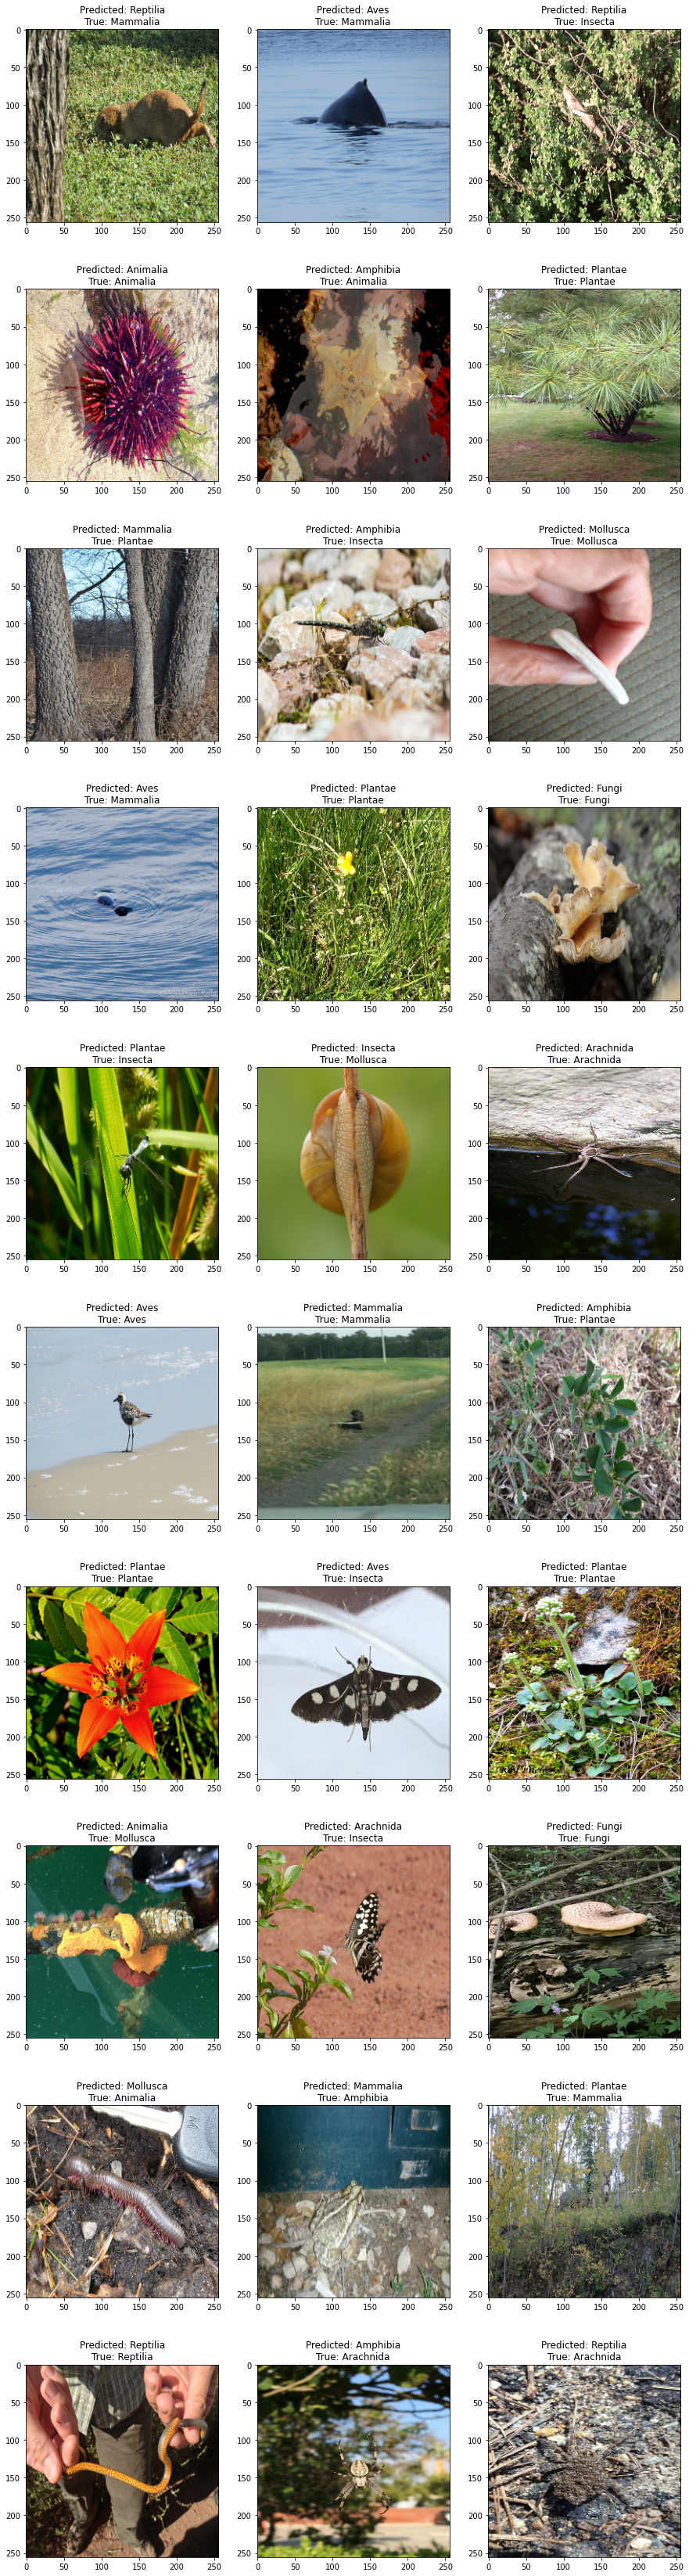

In [84]:
import os
labels_list = sorted(os.listdir('/content/drive/MyDrive/nature_12K/inaturalist_12K/val/'))
img_count = 0
row_count = 0
col_count = 0

fig, axs = plt.subplots(10, 3, figsize = (15, 60))
for (data, label) in test_dataset:
    if img_count < 30:
  
        predicted_lab = labels_list[np.argmax(model.predict(np.array(data[0]).reshape(1, 256, 256, 3)))]
        axs[row_count,col_count].imshow(np.array(data[0], dtype = np.int32))
        axs[row_count,col_count].set_title('Predicted: {}\nTrue: {}'.format(predicted_lab, labels_list[np.argmax(label)]))
        
        img_count += 1
        col_count += 1
        if col_count == 3:
            col_count = 0
            row_count += 1
    else:
        break

wandb.init(entity=entity_name,project=project_name, name="log_images")
wandb.log({"images":fig})
wandb.run.finish()

        #img_count += 3

In [73]:
test_idg = ImageDataGenerator(
            rescale=1. /255
        )
test_generator = test_idg.flow_from_directory(
        r"/content/drive/MyDrive/nature_12K/inaturalist_12K/val/",
        batch_size=32, 
        target_size=(256, 256)
    )

Found 2000 images belonging to 10 classes.


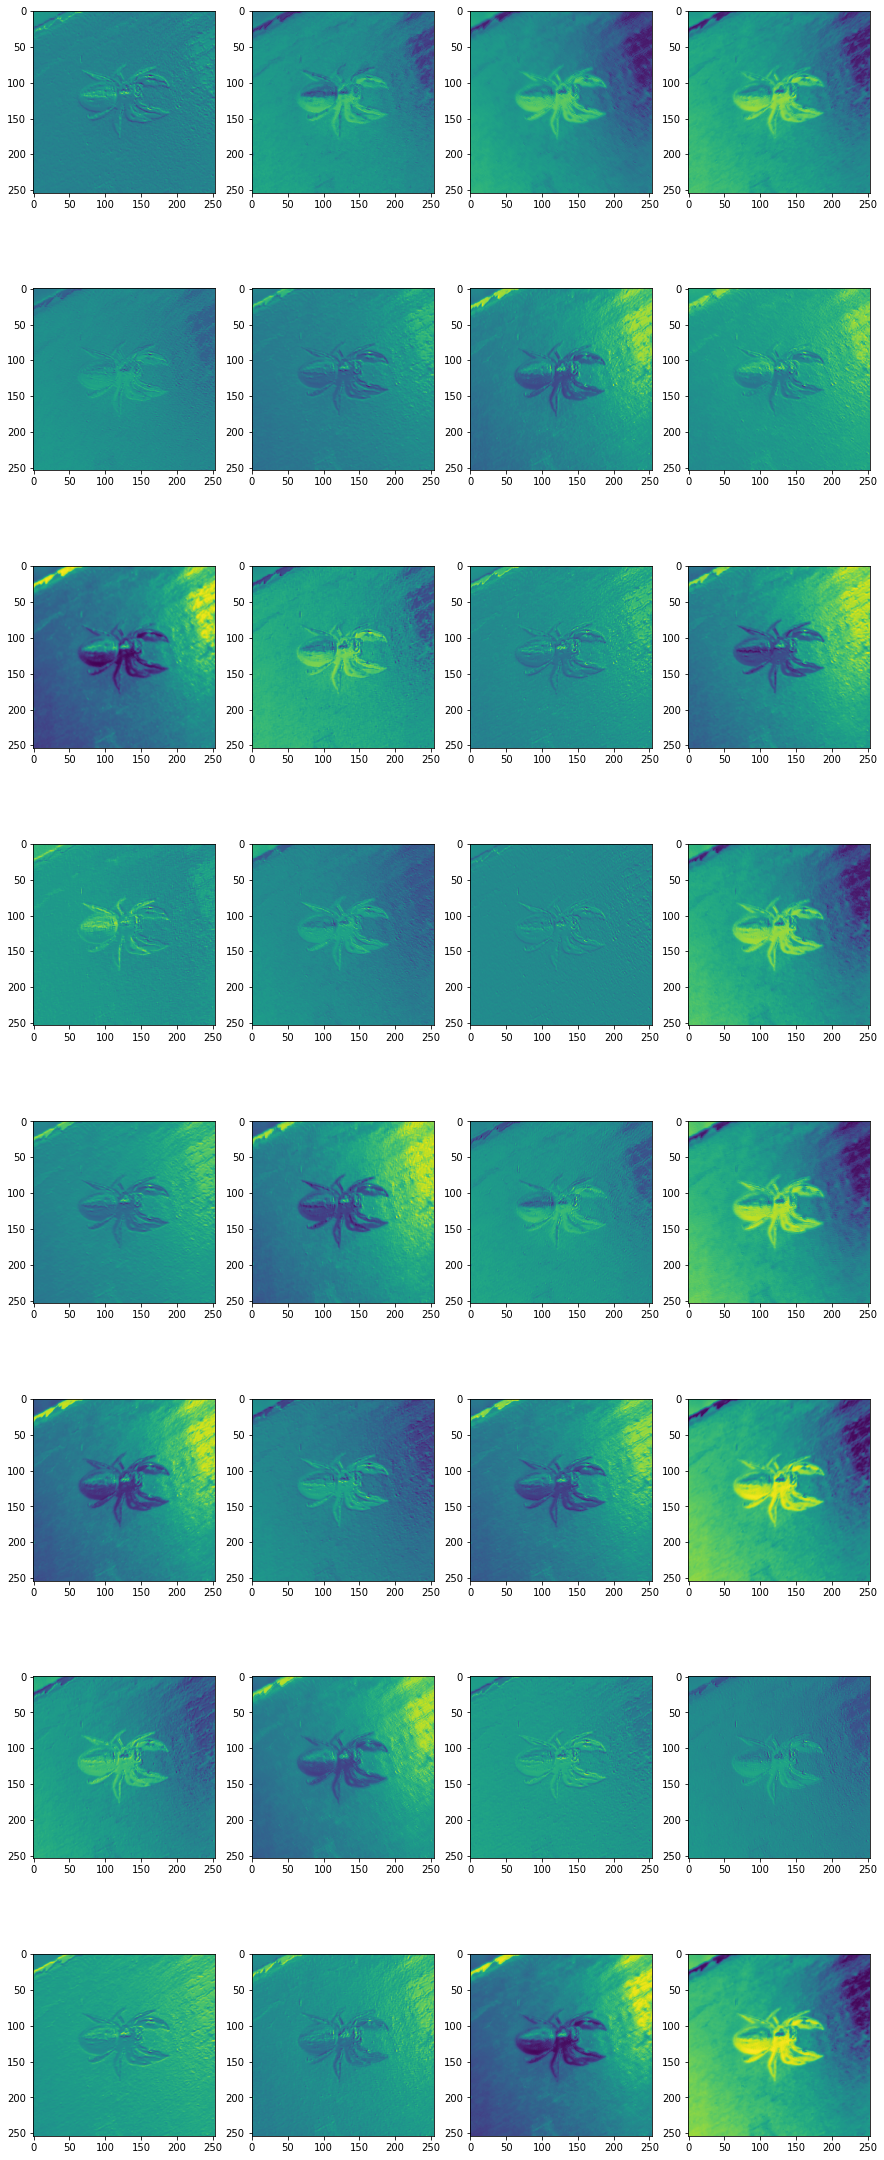

In [85]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' in layer.name:
        break

first_layer_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
img = test_generator.next()
#img = img_to_array(img)
#img = expand_dims(img, axis=0)
feature_maps = first_layer_model.predict(img[0])

rows = 8
cols = 4
ix = 1
fig, axs = plt.subplots(8, 4, figsize = (15, 40))
for i in range(rows):
    for j in range(cols):
        axs = plt.subplot(rows, cols, ix)
        plt.imshow(feature_maps[0,:, :, ix-1])
        ix+=1

plt.show()

wandb.init(entity=entity_name,project=project_name, name="log_filter_maps")
wandb.log({"images":fig})




Guided BackProp